<h1>Historical Cryptocurrency Financial Data </h1>



In [1]:
#import all the necessary packages.

import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import datetime 
import warnings
from collections import Counter
import seaborn as sns
from texttable import Texttable

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
# loading the data using pandas' read_csv file.
data = pd.read_csv('consolidated_coin_data.csv')


# Understanding the data in hand:
Analize the statastical importance of each feature of the data <br>
What is a dataset? <br>
Rows and columns <br>
Data-point <br>
Feature/variable <br>

In [3]:
# prints column-names or feature-names
data.columns

Index(['Currency', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [4]:
print ('Number of data points : ', data.shape[0])
print('Number of features/variables:', data.shape[1])
data.head() # prints the top rows in the table.

Number of data points :  97256
Number of features/variables: 8


,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,0x,"Dec 27, 2017",0.648181,0.712597,0.617503,0.669701,"11,866,800","306,131,000"
1,0x,"Dec 26, 2017",0.693401,0.708796,0.563918,0.647725,"12,996,000","327,270,000"
2,0x,"Dec 25, 2017",0.634725,0.717725,0.630453,0.696416,"8,668,880","317,362,000"
3,0x,"Dec 24, 2017",0.651100,0.672352,0.534855,0.628460,"11,478,700","325,550,000"
4,0x,"Dec 23, 2017",0.502023,0.768043,0.485584,0.645686,"24,164,900","251,012,000"


###  Features stats

####  Basic stats for the feature: Currency

In [5]:
# As currency is a key feature home any unique elements exists can be useful
print ('Number of uniques currencies are:', data['Currency'].unique().shape[0])

Number of uniques currencies are: 200


In [6]:
#Stats for all features in the data 
descriptionTable = Texttable()
descriptionTable.add_rows([['data description table', '-'],\
            [data['Currency'].describe(), data['Date'].describe()],\
            [data['Close'].describe(), data['Open'].describe()],\
            [data['High'].describe(), data['Low'].describe()],\
            [data['Volume'].describe(), data['Market Cap'].describe()]])
print(descriptionTable.draw())

+-------------------------------+---------------------------------+
|    data description table     |                -                |
+===============================+=================================+
| count        97256            | count            97256          |
| unique         200            | unique            1705          |
| top       namecoin            | top       Dec 27, 2017          |
| freq          1705            | freq               200          |
| Name: Currency, dtype: object | Name: Date, dtype: object       |
+-------------------------------+---------------------------------+
| count    9.725600e+04         | count    9.725600e+04           |
| mean     2.886185e+01         | mean     2.866313e+01           |
| std      3.460564e+02         | std      3.425018e+02           |
| min      2.500000e-09         | min      2.500000e-09           |
| 25%      4.845750e-03         | 25%      4.822000e-03           |
| 50%      9.368500e-02         | 50%      9.283

In [7]:
#Stats for Currency feature
#print(data['Currency'].describe())

# Data Cleaning

In [8]:
print(data.shape[0])

97256


Convert the data into the requilred data type and fromat
- Market Cap existing data type object required float.
- Volume existing data type object required float.
- Date existing data type object required Date.
- Low, High, Open, Close existing data type float64 no change required.
- Currency existing data type object required string.
- As seen from the feature description  Market Cap and Volume had a deviated data i.e., "-" so the record with that data value must be removed

In [9]:
#Null check for all the data features
data = data.loc[~data['Market Cap'].isnull()] 
data = data.loc[~data['Volume'].isnull()]
data = data.loc[~data['Date'].isnull()]
data = data.loc[~data['Low'].isnull()]
data = data.loc[~data['High'].isnull()]
data = data.loc[~data['Open'].isnull()]
data = data.loc[~data['Close'].isnull()]
data = data.loc[~data['Currency'].isnull()]
print(data.shape[0])

97256


In [10]:
data = data.loc[~data['Market Cap'].str.contains("-")]
data = data.loc[~data['Volume'].str.contains("-")]
print(data.shape[0])

92237


In [11]:
data = data.reset_index(drop=True)

In [12]:
pd.to_datetime(data['Date'][0])

Timestamp('2017-12-27 00:00:00')

In [13]:
#monthDict = {"Jan":1,"Feb":2,"Mar":3,"Apr":4, "May":5, "Jun":6, "Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
count = 0
while( count < data.shape[0]):
    data['Market Cap'][count] = float(data['Market Cap'][count].replace(",",""))
    data['Volume'][count] = float(data['Volume'][count].replace(",",""))
    data['Currency'][count] = str(data['Currency'][count])
    #date = str(data['Date'][count]).replace(",","").split(" ")
    #data['Date'][count] = datetime.date(int(date[2]),monthDict[date[0]],int(date[1]))
    data['Date'][count] = pd.to_datetime(data['Date'][count])
    count = count+1

In [14]:
data.head(5)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,0x,2017-12-27 00:00:00,0.648181,0.712597,0.617503,0.669701,1.18668e+07,3.06131e+08
1,0x,2017-12-26 00:00:00,0.693401,0.708796,0.563918,0.647725,1.2996e+07,3.2727e+08
2,0x,2017-12-25 00:00:00,0.634725,0.717725,0.630453,0.696416,8.66888e+06,3.17362e+08
3,0x,2017-12-24 00:00:00,0.651100,0.672352,0.534855,0.628460,1.14787e+07,3.2555e+08
4,0x,2017-12-23 00:00:00,0.502023,0.768043,0.485584,0.645686,2.41649e+07,2.51012e+08


In [15]:
print(data.shape[0])

92237


As the data is huge and is taking a considerabily lot of time, so pickilng this data and will be using this for further data processing. 

In [16]:
#data.to_pickle('92237_currency_data')

In [2]:
data = pd.read_pickle('92237_currency_data')

In [3]:
data.head(5)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,0x,2017-12-27 00:00:00,0.648181,0.712597,0.617503,0.669701,1.18668e+07,3.06131e+08
1,0x,2017-12-26 00:00:00,0.693401,0.708796,0.563918,0.647725,1.2996e+07,3.2727e+08
2,0x,2017-12-25 00:00:00,0.634725,0.717725,0.630453,0.696416,8.66888e+06,3.17362e+08
3,0x,2017-12-24 00:00:00,0.651100,0.672352,0.534855,0.628460,1.14787e+07,3.2555e+08
4,0x,2017-12-23 00:00:00,0.502023,0.768043,0.485584,0.645686,2.41649e+07,2.51012e+08


# Questions :

Which currencies are the most volatile?

What is the average age of the top 10 coins by market cap?

Which coins in the top two hundred are less than 6 months old?

What day of the week is best to buy/sell?

What is the correlation between bitcoin and alt coin prices?

## Which currencies are the most volatile?

Most volatile data will be having the most sandard deviation. So max SD currency must be found out.<br>
And as the market cap is thet key feature thet data eniries with empty market cap are removed

In [4]:
currenciesList = data['Currency'].unique()
dataArray = np.array(data)

In [5]:
standarDeviationDic = {}
for currency in currenciesList:
    currencyData = dataArray[np.where(dataArray[:,0] == currency)]
    standarDeviationDic[currency] = np.std(currencyData[:,7])
voatileCurrency = max(standarDeviationDic, key=standarDeviationDic.get)
print(voatileCurrency, "-", standarDeviationDic.get(voatileCurrency))

bitcoin - 40788929227.9


BitCoin is the Most volatire currency in the data set presented.

### Top 20 currencies standard deviation garphical representation

In [6]:
max20StandarDeviation = sorted(standarDeviationDic, key=standarDeviationDic.get, reverse=True)[:20]
curencySdArray = []
for curencySd in max20StandarDeviation:
    curencySdArray.append(standarDeviationDic.get(curencySd))

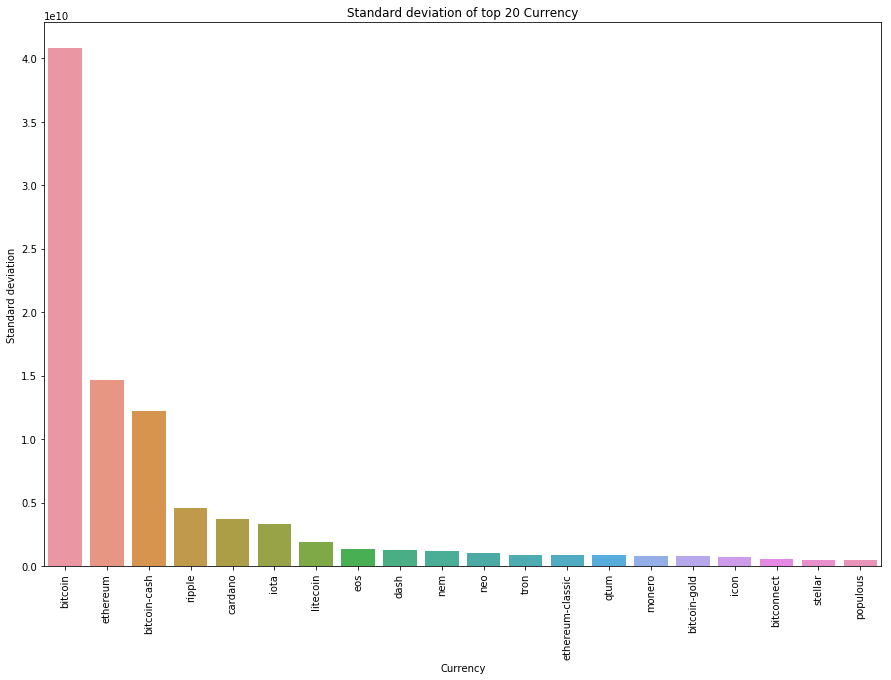

In [7]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=max20StandarDeviation, y=curencySdArray)
plt.xticks(rotation= 90)
plt.xlabel('Currency')
plt.ylabel('Standard deviation')
plt.title('Standard deviation of top 20 Currency')
plt.show() 

## What is the average age of the top 10 coins by market cap?

In [8]:
currencyAgeDic = {}
for currency in currenciesList:
    currencyData = dataArray[np.where(dataArray[:,0] == currency)]
    currencyAgeDic[currency] = max(currencyData[:,1]) - min(currencyData[:,1])
    
max10CurrencyAge = sorted(currencyAgeDic, key=currencyAgeDic.get, reverse=True)[:10]
for currency in max10CurrencyAge:
    print(currency, "-", currencyAgeDic.get(currency))

bitcoin - 1461 days 00:00:00
dogecoin - 1461 days 00:00:00
feathercoin - 1461 days 00:00:00
litecoin - 1461 days 00:00:00
namecoin - 1461 days 00:00:00
peercoin - 1461 days 00:00:00
ripple - 1461 days 00:00:00
nxt - 1460 days 00:00:00
vertcoin - 1437 days 00:00:00
digibyte - 1420 days 00:00:00


### Top 50 oldest currencies age garphical representation

In [9]:
top50CurrenciesAge = sorted(currencyAgeDic, key=currencyAgeDic.get, reverse=True)[:50]
currencyAgeArray = []
for currencyAge in top50CurrenciesAge:
    currencyAgeArray.append(currencyAgeDic.get(currencyAge).days)

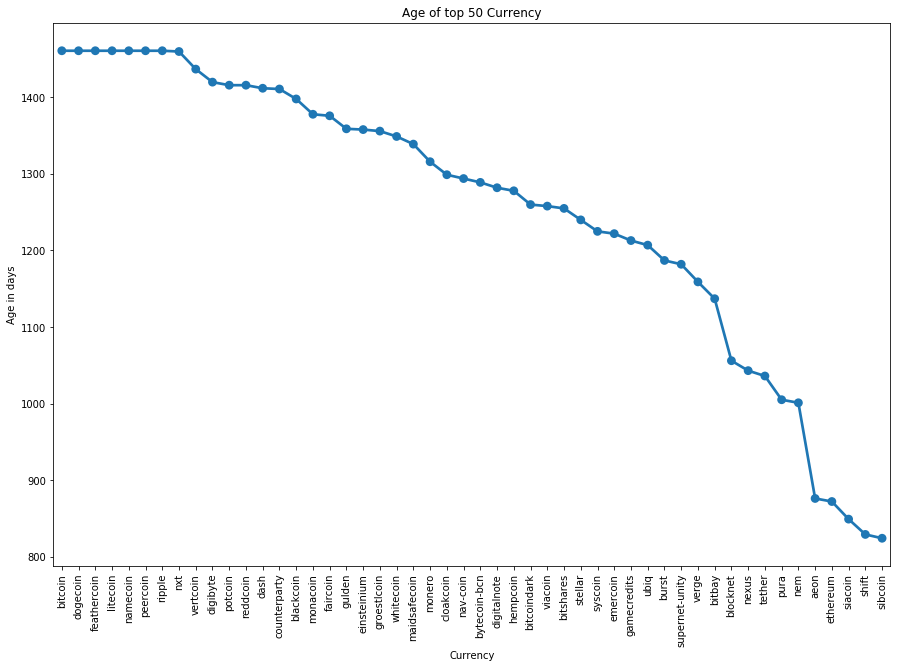

In [10]:
plt.figure(figsize=(15,10))
ax= sns.pointplot(x=top50CurrenciesAge, y=currencyAgeArray)
plt.xticks(rotation= 90)
plt.xlabel('Currency')
plt.ylabel('Age in days')
plt.title('Age of top 50 Currency')
plt.show() 

## Which currencies are less than 6 months old?

In [11]:
print (datetime.datetime.now() - datetime.timedelta(365/2))

2017-09-13 03:16:34.787793


In [12]:
currencies = []
for currency in currenciesList:
    currencyData = dataArray[np.where(dataArray[:,0] == currency)]
    if((min(currencyData[:,1]) - (datetime.datetime.now() - datetime.timedelta(365/2))).days >= 0 ):
        currencies.append(currency)
print(len(currencies), "currencies are less than 6 months old" )
print(currencies, end=" ")

54 currencies are less than 6 months old
['achain', 'aion', 'airswap', 'amber', 'attention-token-of-media', 'bitcoin-gold', 'blockv', 'bridgecoin', 'cardano', 'chainlink', 'cindicator', 'cobinhood', 'cryptonex', 'cybermiles', 'decentraland', 'delphy', 'dragonchain', 'eidoo', 'electroneum', 'enigma-project', 'enjin-coin', 'etherparty', 'ethlend', 'icon', 'ink', 'iot-chain', 'kin', 'kucoin-shares', 'kyber-network', 'modum', 'neblio', 'open-trading-network', 'paccoin', 'paypie', 'power-ledger', 'qash', 'quantstamp', 'raiden-network-token', 'rchain', 'red-pulse', 'request-network', 'revain', 'ripio-credit-network', 'salt', 'storm', 'streamr-datacoin', 'substratum', 'time-new-bank', 'tron', 'vechain', 'viberate', 'wabi', 'xplay', 'yoyow'] 

## What is the correlation between bitcoin and alt coin prices?

### Data Reduction

In [13]:
# find the 100 most frequent currencies.
productTypeCount = Counter(list(data['Currency']))
mostCommonCurrencies = [row[0] for row in productTypeCount.most_common(100)]

In [14]:
mostCommonCurrenciesData = data[data['Currency'].isin(mostCommonCurrencies)]
print(mostCommonCurrenciesData.shape[0])

82760


In [15]:
#adding a new column called average 
mostCommonCurrenciesData['Day Average'] = (mostCommonCurrenciesData['Close'] + mostCommonCurrenciesData['Open'] )/2
currencyAverageList = mostCommonCurrenciesData[['Currency','Date', 'Day Average']]

In [16]:
#currencyAveragePerDay =np.array(
#[[0]*maxDataSizePerCurrency]*currencyAverageList['Currency'].unique().shape[0])


maxDataSizePerCurrency = 0
size = 0
maxDataCurrency = ''
for currency in currencyAverageList['Currency'].unique():
    size = currencyAverageList[currencyAverageList['Currency'] == currency]['Day Average'].shape[0]
    if maxDataSizePerCurrency < size:
        maxDataSizePerCurrency = size
        maxDataCurrency = currency
print(maxDataSizePerCurrency, maxDataCurrency)

1462 bitcoin


In [17]:
crypto_coin = []
crypto_list = []
for i in data.Currency.unique():
    # we only take crypto coin that got more than 200 rows
    if data[data.Currency==i][['Date','Close']].shape[0] > 200:
        crypto_coin.append(data[data.Currency==i][['Date','Close']])
        crypto_list.append(i)

In [18]:
import functools
concatenated=functools.reduce(lambda left,right: pd.merge(left,right,on='Date',how='left' if left.shape[0] > right.shape[0] else 'right'),  currencyAverageList['Currency'].unique())

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
DataSize = pd.DataFrame()
for currency in currencyAveragePerDay['Currency'].unique():
    newDF = newDF.append(oldDF, ignore_index = True)


In [78]:
corr = currencyAveragePerDay.corr(data['Currency'])
plt.figure(figsize=(20,20))
sns.heatmap(currencyAveragePerDay.corr())
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [74]:
#data['Currency'].unique()

## What day of the week is best to buy/sell?

# --------------------------------------------------------------------------

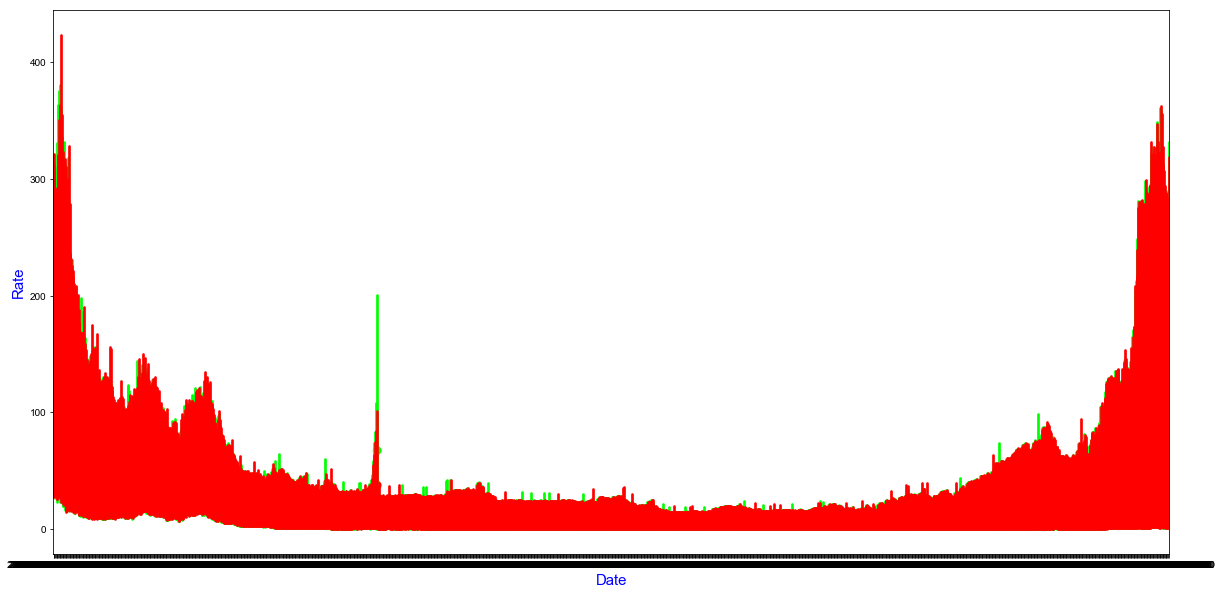

In [31]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.set_style("whitegrid");
sns.pointplot(x='Date',y='Open',data=data,color='lime',alpha=0.8)
sns.pointplot(x='Date',y='Close',data=data,color='red',alpha=0.8)
plt.xlabel('Date',fontsize = 15,color='blue')
plt.ylabel('Rate',fontsize = 15,color='blue')
plt.show() 

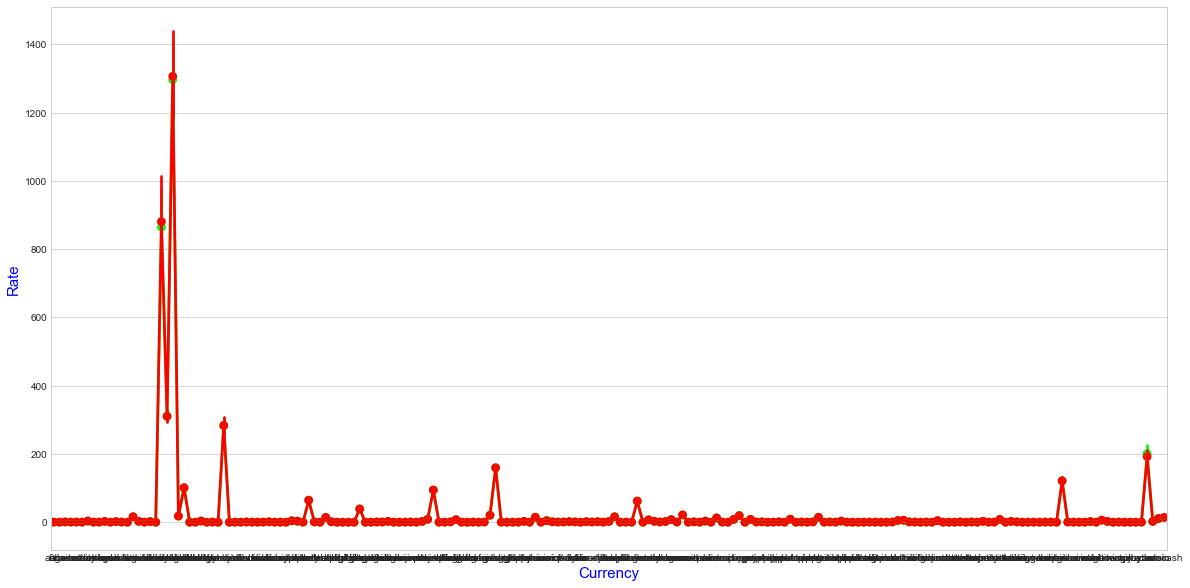

In [32]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='Currency',y='Open',data=data,color='lime',alpha=0.8)
sns.pointplot(x='Currency',y='Close',data=data,color='red',alpha=0.8)
plt.xlabel('Currency',fontsize = 15,color='blue')
plt.ylabel('Rate',fontsize = 15,color='blue')
plt.show() 

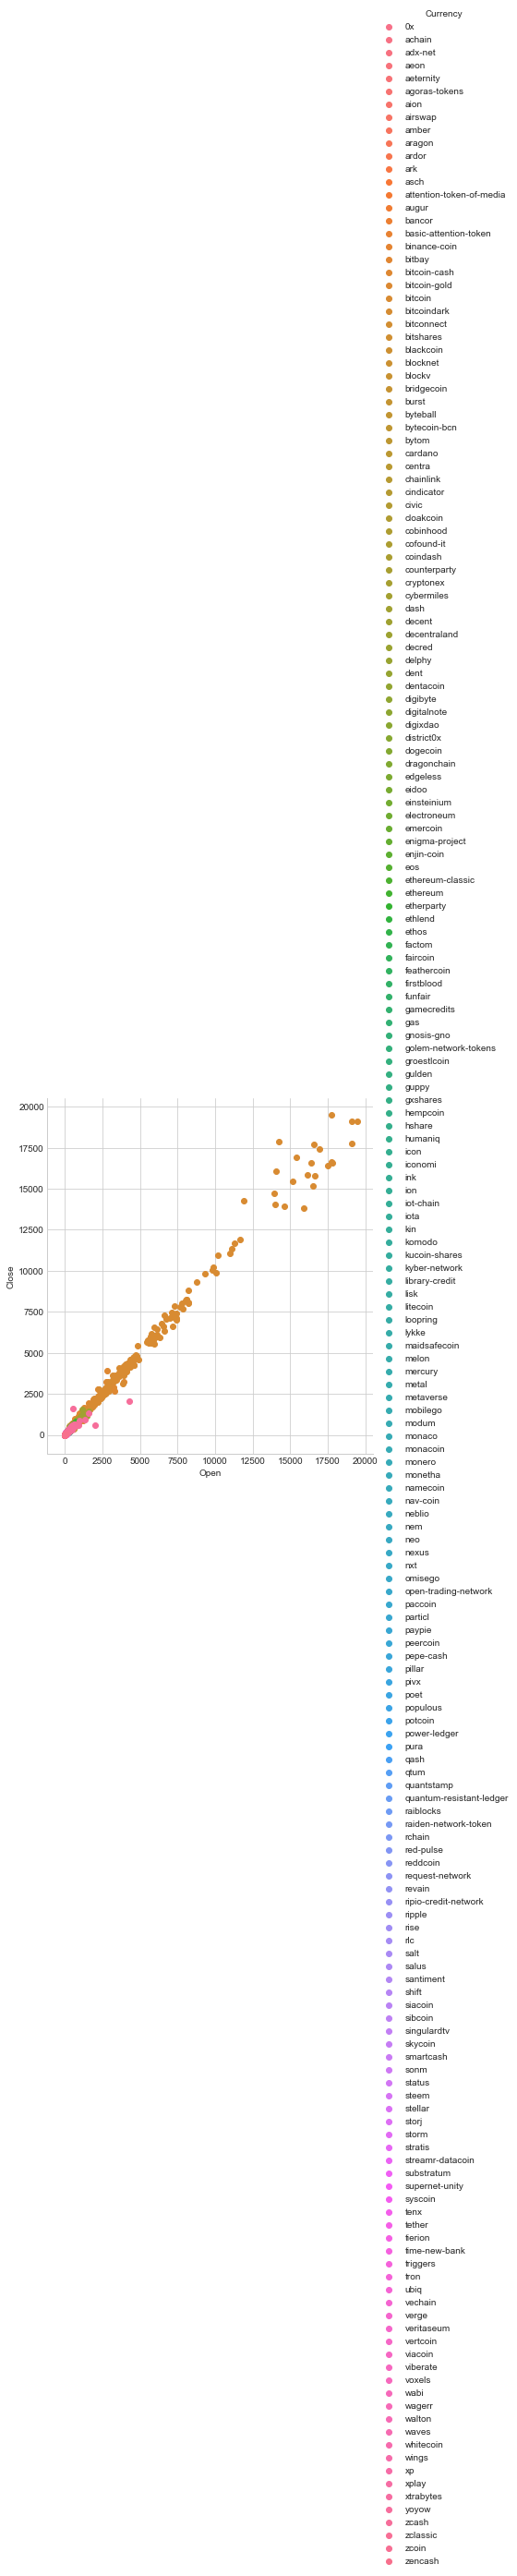

In [33]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(data, hue="Currency", size=6).map(plt.scatter, 'Open', 'Close').add_legend()
plt.show()